In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [5]:
from google.colab import files
uploaded = files.upload()

# Load CSV (use the correct filename if different)
df = pd.read_csv('bank-full.csv', sep=';')
df.head()

Saving bank.csv to bank (1).csv
Saving bank-full.csv to bank-full (1).csv
Saving bank-names.txt to bank-names (1).txt


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
y
no     39922
yes     5289
Name: count, dtype: int64


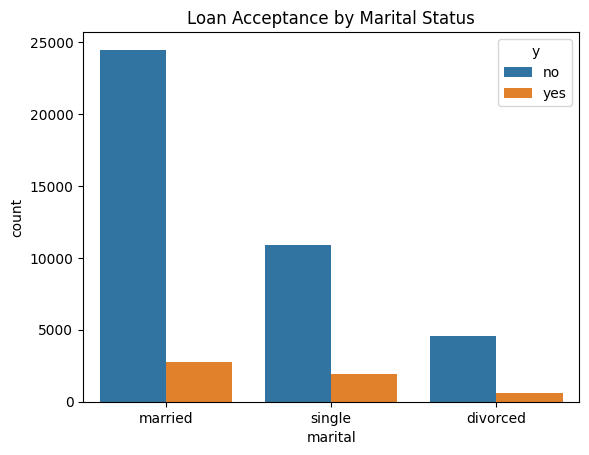

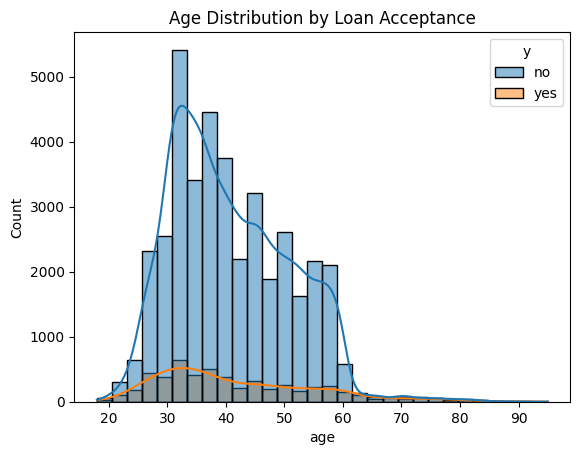

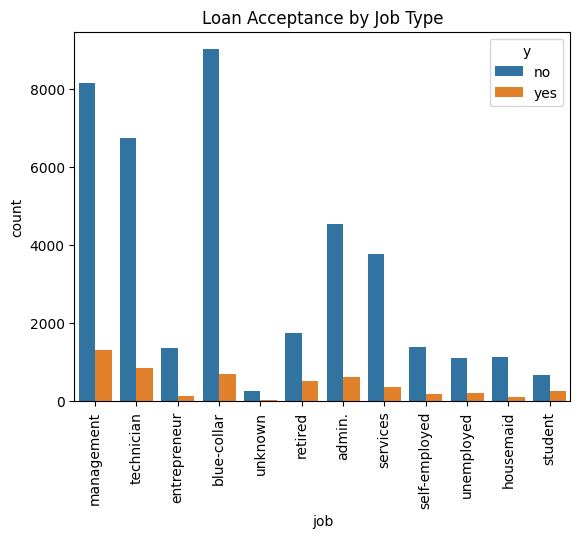

In [6]:
# View info and missing values
print(df.info())
print(df['y'].value_counts())

# Explore key features
sns.countplot(x='marital', hue='y', data=df)
plt.title("Loan Acceptance by Marital Status")
plt.show()

sns.histplot(data=df, x='age', hue='y', bins=30, kde=True)
plt.title("Age Distribution by Loan Acceptance")
plt.show()

sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=90)
plt.title("Loan Acceptance by Job Type")
plt.show()


In [7]:
# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le


In [8]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']  # Target: 1=Yes, 0=No

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.57      0.20      0.30      1091

    accuracy                           0.89      9043
   macro avg       0.73      0.59      0.62      9043
weighted avg       0.86      0.89      0.86      9043

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7952
           1       0.59      0.40      0.48      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.68      0.71      9043
weighted avg       0.88      0.89      0.88      9043



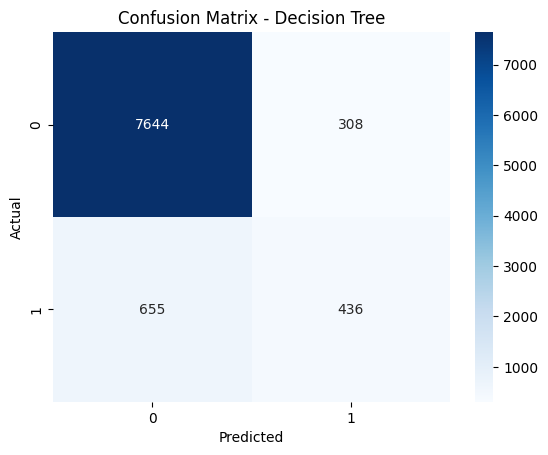

In [11]:
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

print("Decision Tree Report:")
print(classification_report(y_test, y_pred_tree))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [12]:
# Group by marital status and job
loan_rate = df.groupby(['marital', 'job'])['y'].value_counts(normalize=True).unstack().fillna(0)
loan_rate['acceptance_rate'] = loan_rate['yes']
loan_rate.sort_values(by='acceptance_rate', ascending=False)[['acceptance_rate']]



y                       acceptance_rate
marital  job                           
single   student               0.293850
divorced retired               0.284706
married  retired               0.220682
single   unemployed            0.194514
         self-employed         0.192825
married  student               0.185185
single   unknown               0.176471
divorced student               0.166667
single   housemaid             0.166667
         management            0.162199
divorced unemployed            0.157895
         self-employed         0.157143
single   admin.                0.135995
married  unemployed            0.132695
single   technician            0.132443
divorced management            0.127813
married  management            0.126111
single   retired               0.120370
divorced admin.                0.120000
single   services              0.117696
married  admin.                0.113628
single   entrepreneur          0.113445
         blue-collar           0.105760
married  unknown               0.103448
         technician            0.102665
divorced housemaid             0.097826
         services              0.091075
         entrepreneur          0.083799
         technician            0.083243
married  self-employed         0.079557
divorced blue-collar           0.077333
married  entrepreneur          0.075701
         services              0.073951
         housemaid             0.073465
         blue-collar           0.062715
divorced unknown               0.058824

In [14]:
import numpy as np
from sklearn.utils import class_weight

# Fix: convert [0, 1] to numpy array
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),
    y=y_train
)

print(dict(enumerate(class_weights)))


{0: np.float64(0.5656553018454802), 1: np.float64(4.307765602667937)}


In [15]:
log_model = LogisticRegression(max_iter=1000, class_weight={0: class_weights[0], 1: class_weights[1]})
log_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: np.float64(0.5656553018454802),
                                 1: np.float64(4.307765602667937)},
                   max_iter=1000)

In [16]:
tree_model = DecisionTreeClassifier(max_depth=5, class_weight={0: class_weights[0], 1: class_weights[1]})
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: np.float64(0.5656553018454802),
                                     1: np.float64(4.307765602667937)},
                       max_depth=5)

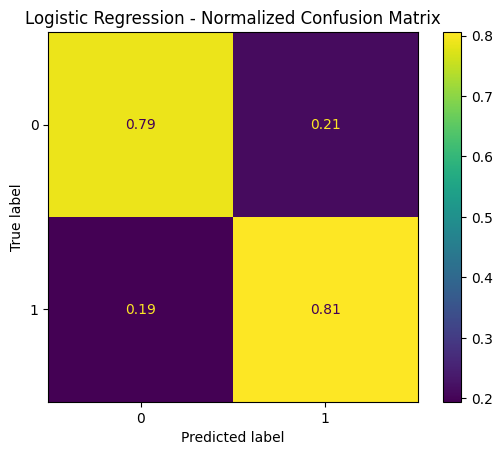

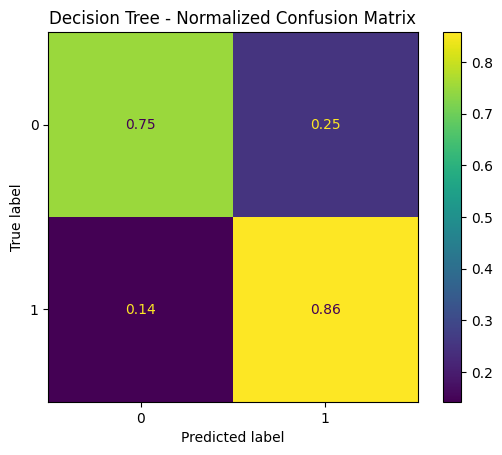

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions with the weighted models
y_pred_log_weighted = log_model.predict(X_test)
y_pred_tree_weighted = tree_model.predict(X_test)

# Logistic Regression CM
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log_weighted, normalize='true')
plt.title("Logistic Regression - Normalized Confusion Matrix")
plt.show()

# Decision Tree CM
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree_weighted, normalize='true')
plt.title("Decision Tree - Normalized Confusion Matrix")
plt.show()